In [2]:
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting
from fastf1.ergast import Ergast
import numpy as np
import pandas as pd

In [3]:
fastf1.Cache.enable_cache('cache')

In [4]:
# Get al the Schedules form 2018 to 2023
schedule2018 = fastf1.get_event_schedule(2018)
schedule2019 = fastf1.get_event_schedule(2019)
schedule2020 = fastf1.get_event_schedule(2020)
schedule2021 = fastf1.get_event_schedule(2021)
schedule2022 = fastf1.get_event_schedule(2022)
schedule2023 = fastf1.get_event_schedule(2023)

In [5]:
schedule2023

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,...,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
0,0,Bahrain,Sakhir,FORMULA 1 ARAMCO PRE-SEASON TESTING 2023,2023-02-25,Pre-Season Testing,testing,Practice 1,2023-02-23 10:00:00+03:00,2023-02-23 07:00:00,...,Practice 3,2023-02-25 10:00:00+03:00,2023-02-25 07:00:00,None,NaT,NaT,None,NaT,NaT,True
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,2023-03-05,Bahrain Grand Prix,conventional,Practice 1,2023-03-03 14:30:00+03:00,2023-03-03 11:30:00,...,Practice 3,2023-03-04 14:30:00+03:00,2023-03-04 11:30:00,Qualifying,2023-03-04 18:00:00+03:00,2023-03-04 15:00:00,Race,2023-03-05 18:00:00+03:00,2023-03-05 15:00:00,True
2,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2023,2023-03-19,Saudi Arabian Grand Prix,conventional,Practice 1,2023-03-17 16:30:00+03:00,2023-03-17 13:30:00,...,Practice 3,2023-03-18 16:30:00+03:00,2023-03-18 13:30:00,Qualifying,2023-03-18 20:00:00+03:00,2023-03-18 17:00:00,Race,2023-03-19 20:00:00+03:00,2023-03-19 17:00:00,True
3,3,Australia,Melbourne,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2023,2023-04-02,Australian Grand Prix,conventional,Practice 1,2023-03-31 12:30:00+10:00,2023-03-31 02:30:00,...,Practice 3,2023-04-01 12:30:00+10:00,2023-04-01 02:30:00,Qualifying,2023-04-01 16:00:00+10:00,2023-04-01 06:00:00,Race,2023-04-02 15:00:00+10:00,2023-04-02 05:00:00,True
4,4,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2023,2023-04-30,Azerbaijan Grand Prix,sprint_shootout,Practice 1,2023-04-28 13:30:00+04:00,2023-04-28 09:30:00,...,Sprint Shootout,2023-04-29 12:30:00+04:00,2023-04-29 08:30:00,Sprint,2023-04-29 17:30:00+04:00,2023-04-29 13:30:00,Race,2023-04-30 15:00:00+04:00,2023-04-30 11:00:00,True
5,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2023,2023-05-07,Miami Grand Prix,conventional,Practice 1,2023-05-05 14:00:00-04:00,2023-05-05 18:00:00,...,Practice 3,2023-05-06 12:30:00-04:00,2023-05-06 16:30:00,Qualifying,2023-05-06 16:00:00-04:00,2023-05-06 20:00:00,Race,2023-05-07 15:30:00-04:00,2023-05-07 19:30:00,True
6,6,Monaco,Monaco,FORMULA 1 GRAND PRIX DE MONACO 2023,2023-05-28,Monaco Grand Prix,conventional,Practice 1,2023-05-26 13:30:00+02:00,2023-05-26 11:30:00,...,Practice 3,2023-05-27 12:30:00+02:00,2023-05-27 10:30:00,Qualifying,2023-05-27 16:00:00+02:00,2023-05-27 14:00:00,Race,2023-05-28 15:00:00+02:00,2023-05-28 13:00:00,True
7,7,Spain,Barcelona,FORMULA 1 AWS GRAN PREMIO DE ESPAÑA 2023,2023-06-04,Spanish Grand Prix,conventional,Practice 1,2023-06-02 13:30:00+02:00,2023-06-02 11:30:00,...,Practice 3,2023-06-03 12:30:00+02:00,2023-06-03 10:30:00,Qualifying,2023-06-03 16:00:00+02:00,2023-06-03 14:00:00,Race,2023-06-04 15:00:00+02:00,2023-06-04 13:00:00,True
8,8,Canada,Montréal,FORMULA 1 PIRELLI GRAND PRIX DU CANADA 2023,2023-06-18,Canadian Grand Prix,conventional,Practice 1,2023-06-16 13:30:00-04:00,2023-06-16 17:30:00,...,Practice 3,2023-06-17 12:30:00-04:00,2023-06-17 16:30:00,Qualifying,2023-06-17 16:00:00-04:00,2023-06-17 20:00:00,Race,2023-06-18 14:00:00-04:00,2023-06-18 18:00:00,True
9,9,Austria,Spielberg,FORMULA 1 ROLEX GROSSER PREIS VON ÖSTERREICH 2023,2023-07-02,Austrian Grand Prix,sprint_shootout,Practice 1,2023-06-30 13:30:00+02:00,2023-06-30 11:30:00,...,Sprint Shootout,2023-07-01 12:00:00+02:00,2023-07-01 10:00:00,Sprint,2023-07-01 16:30:00+02:00,2023-07-01 14:30:00,Race,2023-07-02 15:00:00+02:00,2023-07-02 13:00:00,True


In [6]:
monaco2022 = schedule2022.get_event_by_name('Monaco')

In [7]:
qualifying = monaco2022.get_qualifying()

In [8]:
qualifying.load()

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.0.3]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '11', '1', '4', '63', '14', '44', '5', '31', '22', '77', '20', '3', '47', '23', '10', '18', '6', '24']


In [9]:
qualifying.results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
16,16,C LECLERC,LEC,leclerc,Ferrari,ed1c24,ferrari,Charles,Leclerc,Charles Leclerc,...,MON,1.0,,NaN,0 days 00:01:12.569000,0 days 00:01:11.864000,0 days 00:01:11.376000,NaT,,NaN
55,55,C SAINZ,SAI,sainz,Ferrari,ed1c24,ferrari,Carlos,Sainz,Carlos Sainz,...,ESP,2.0,,NaN,0 days 00:01:12.616000,0 days 00:01:12.074000,0 days 00:01:11.601000,NaT,,NaN
11,11,S PEREZ,PER,perez,Red Bull Racing,1e5bc6,red_bull,Sergio,Perez,Sergio Perez,...,MEX,3.0,,NaN,0 days 00:01:13.004000,0 days 00:01:11.954000,0 days 00:01:11.629000,NaT,,NaN
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,1e5bc6,red_bull,Max,Verstappen,Max Verstappen,...,NED,4.0,,NaN,0 days 00:01:12.993000,0 days 00:01:12.117000,0 days 00:01:11.666000,NaT,,NaN
4,4,L NORRIS,NOR,norris,McLaren,f58020,mclaren,Lando,Norris,Lando Norris,...,GBR,5.0,,NaN,0 days 00:01:12.927000,0 days 00:01:12.266000,0 days 00:01:11.849000,NaT,,NaN
63,63,G RUSSELL,RUS,russell,Mercedes,6cd3bf,mercedes,George,Russell,George Russell,...,GBR,6.0,,NaN,0 days 00:01:12.787000,0 days 00:01:12.617000,0 days 00:01:12.112000,NaT,,NaN
14,14,F ALONSO,ALO,alonso,Alpine,2293d1,alpine,Fernando,Alonso,Fernando Alonso,...,ESP,7.0,,NaN,0 days 00:01:13.394000,0 days 00:01:12.688000,0 days 00:01:12.247000,NaT,,NaN
44,44,L HAMILTON,HAM,hamilton,Mercedes,6cd3bf,mercedes,Lewis,Hamilton,Lewis Hamilton,...,GBR,8.0,,NaN,0 days 00:01:13.444000,0 days 00:01:12.595000,0 days 00:01:12.560000,NaT,,NaN
5,5,S VETTEL,VET,vettel,Aston Martin,2d826d,aston_martin,Sebastian,Vettel,Sebastian Vettel,...,GER,9.0,,NaN,0 days 00:01:13.313000,0 days 00:01:12.613000,0 days 00:01:12.732000,NaT,,NaN
31,31,E OCON,OCO,ocon,Alpine,2293d1,alpine,Esteban,Ocon,Esteban Ocon,...,FRA,10.0,,NaN,0 days 00:01:12.848000,0 days 00:01:12.528000,0 days 00:01:13.047000,NaT,,NaN


In [10]:
session = fastf1.get_session(2023, "Monaco", 'R')
session.load()
laps = session.laps

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.0.3]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']


In [11]:
drivers = session.drivers
print(drivers)

['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']


In [12]:
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

['VER', 'ALO', 'OCO', 'HAM', 'RUS', 'LEC', 'GAS', 'SAI', 'NOR', 'PIA', 'BOT', 'DEV', 'ZHO', 'ALB', 'TSU', 'PER', 'HUL', 'SAR', 'MAG', 'STR']


In [13]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

In [14]:
stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)

   Driver  Stint      Compound  StintLength
0     ALB    1.0        MEDIUM           18
1     ALB    2.0          HARD           34
2     ALB    3.0  INTERMEDIATE           25
3     ALO    1.0          HARD           54
4     ALO    2.0        MEDIUM            1
5     ALO    3.0  INTERMEDIATE           23
6     BOT    1.0          HARD           51
7     BOT    2.0  INTERMEDIATE           26
8     DEV    1.0        MEDIUM           53
9     DEV    2.0  INTERMEDIATE           24
10    GAS    1.0          HARD           47
11    GAS    2.0        MEDIUM            7
12    GAS    3.0  INTERMEDIATE           24
13    HAM    1.0        MEDIUM           31
14    HAM    2.0          HARD           23
15    HAM    3.0  INTERMEDIATE           24
16    HUL    1.0        MEDIUM            1
17    HUL    2.0          HARD           53
18    HUL    3.0  INTERMEDIATE            5
19    HUL    4.0           WET           17
20    LEC    1.0          HARD           44
21    LEC    2.0        MEDIUM  

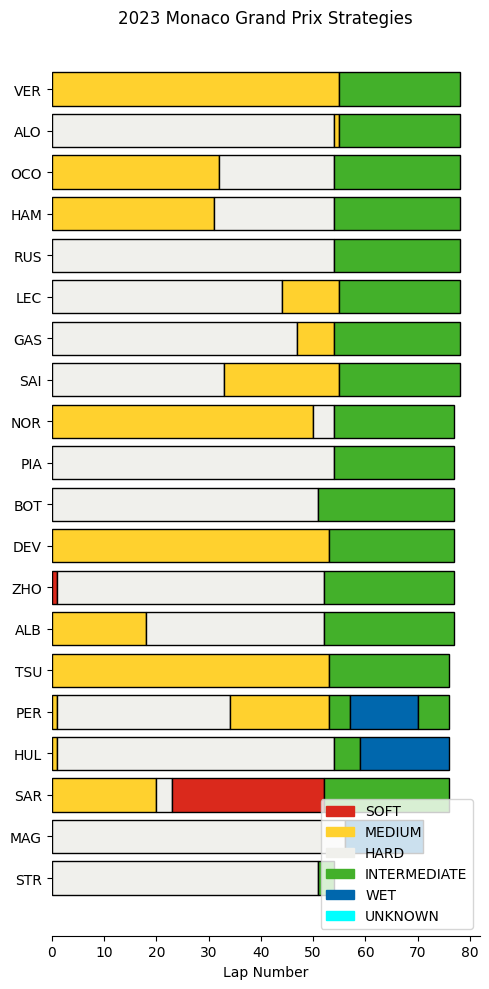

In [15]:
fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

plt.title("2023 Monaco Grand Prix Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# add a legend for the compound colors
handles = [
    plt.Rectangle((0, 0), 1, 1, color=fastf1.plotting.COMPOUND_COLORS[compound])
    for compound in fastf1.plotting.COMPOUND_COLORS
]
labels = fastf1.plotting.COMPOUND_COLORS.keys()
plt.legend(handles, labels, loc="lower right")


plt.tight_layout()
plt.show()


In [16]:
session = fastf1.get_session(2023, 'Monaco Grand Prix', 'Q')
session.load()

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.0.3]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '16', '31', '55', '44', '10', '63', '22', '4', '81', '21', '23', '18', '77', '2', '20', '27', '24', '11']


                     Time  AirTemp  Humidity  Pressure  Rainfall  TrackTemp  \
0  0 days 00:00:30.809000     24.4      43.0    1016.5     False       48.9   
1  0 days 00:01:30.809000     24.4      45.0    1016.5     False       48.9   
2  0 days 00:02:30.808000     24.4      44.0    1016.5     False       49.5   
3  0 days 00:03:30.807000     24.3      45.0    1016.5     False       49.6   
4  0 days 00:04:30.807000     24.3      44.0    1016.5     False       49.1   
..                    ...      ...       ...       ...       ...        ...   
81 0 days 01:21:30.848000     25.1      34.0    1016.0     False       43.9   
82 0 days 01:22:30.863000     25.0      34.0    1016.0     False       44.5   
83 0 days 01:23:30.878000     24.9      34.0    1016.0     False       44.5   
84 0 days 01:24:30.877000     24.9      34.0    1016.0     False       44.5   
85 0 days 01:25:30.876000     24.7      34.0    1016.0     False       43.9   

    WindDirection  WindSpeed  
0             263   

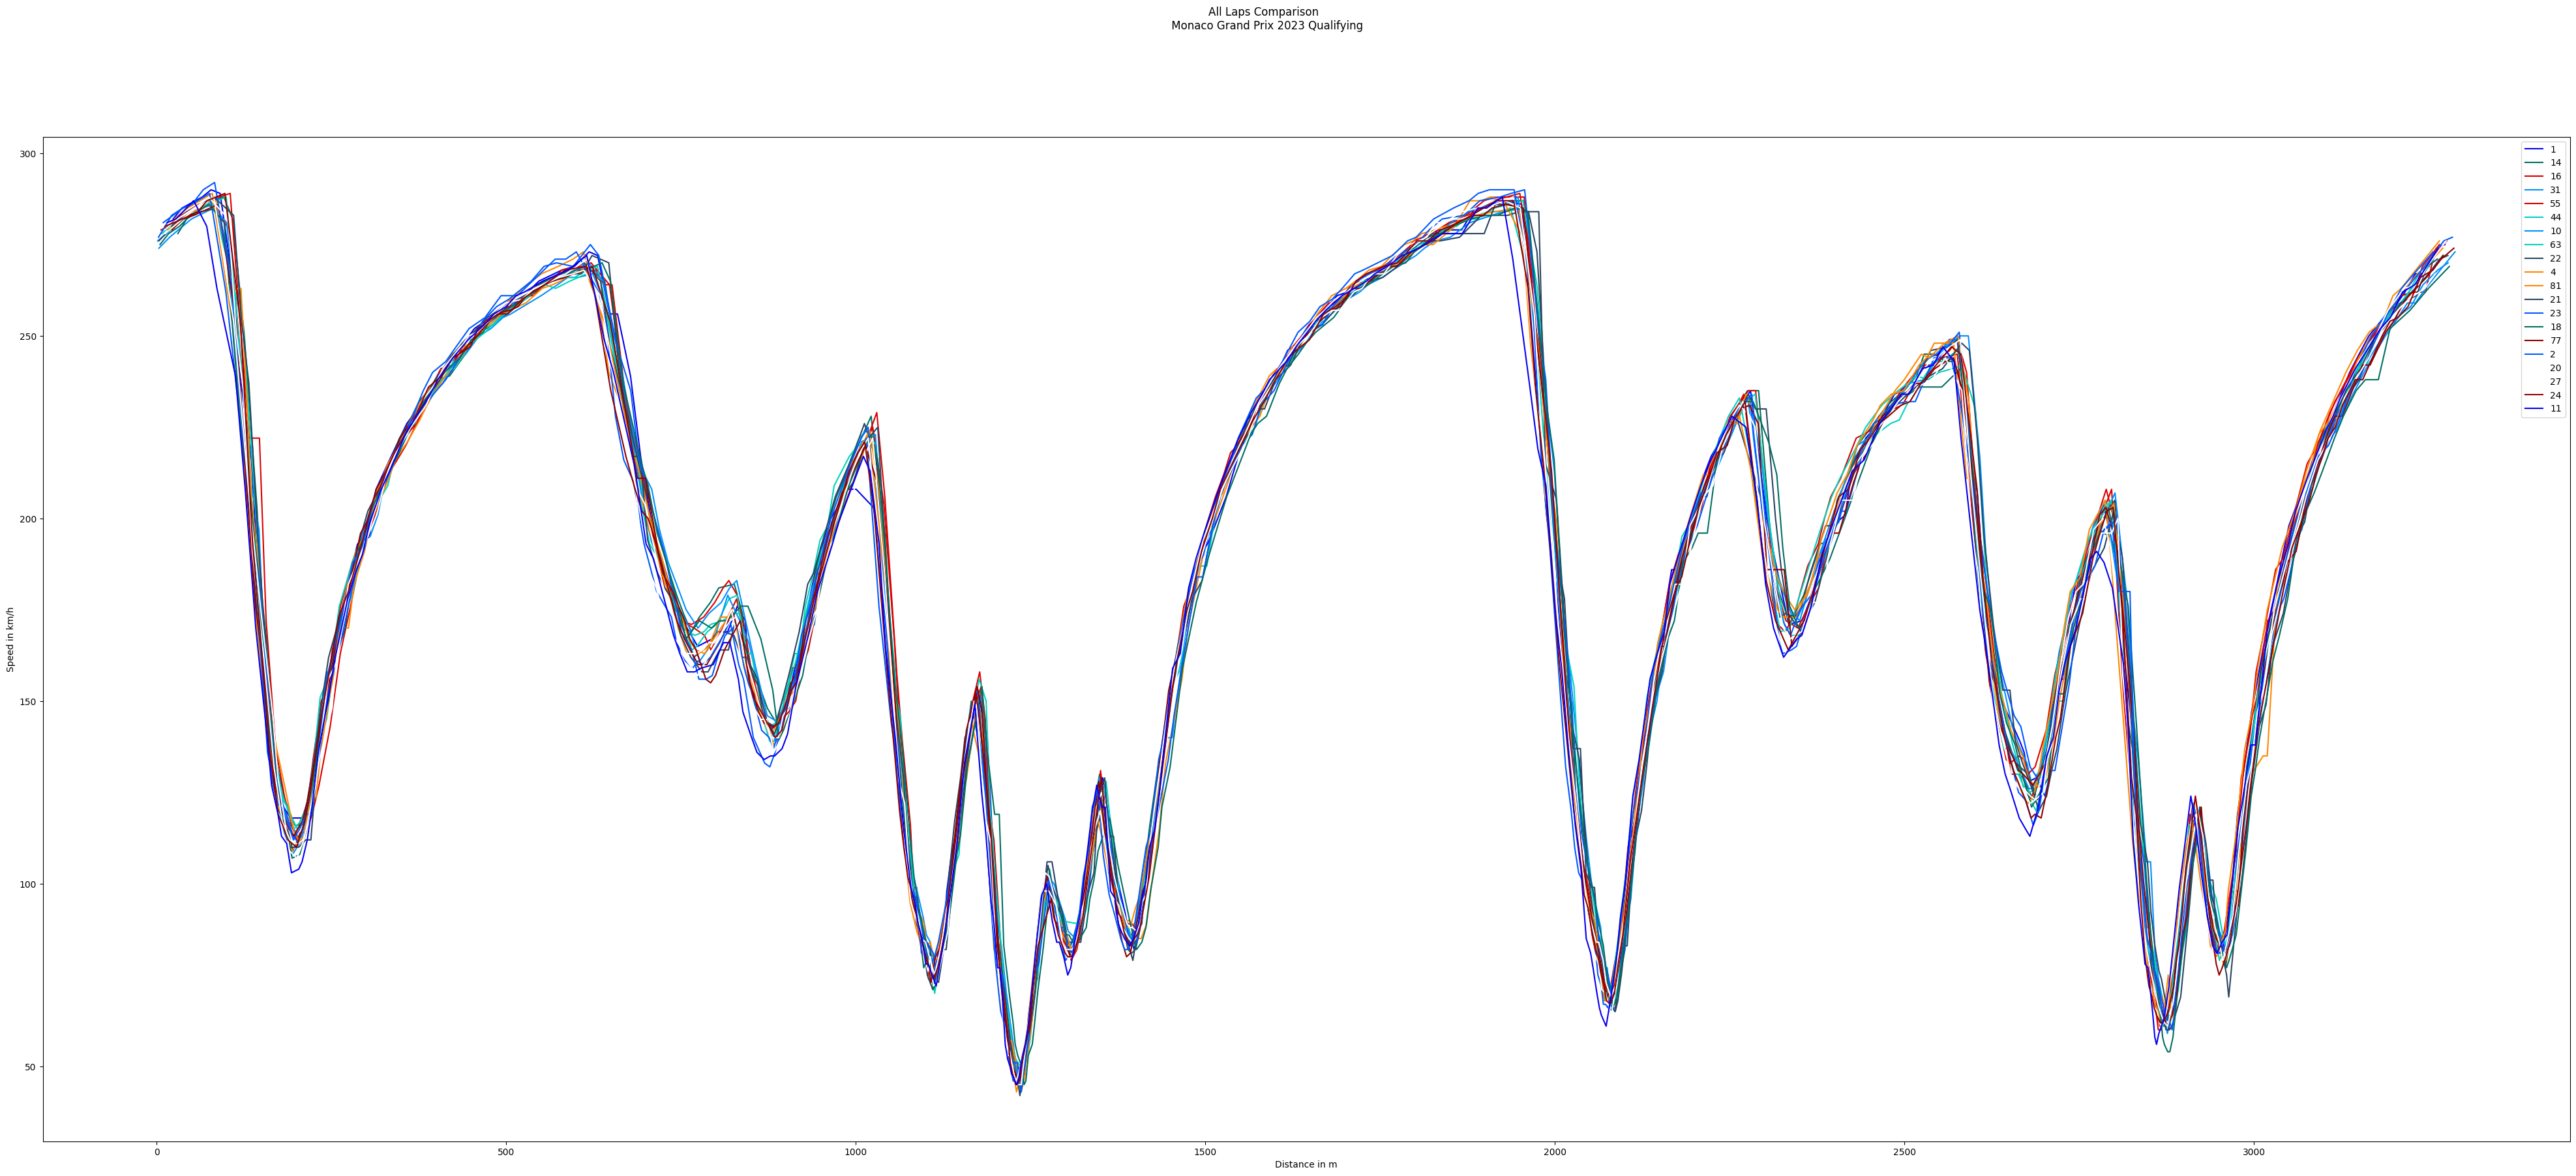

In [17]:

fig, ax = plt.subplots(figsize=(50, 20))
print(session.weather_data)

for driver in session.drivers:
    fastest_lap = session.laps.pick_driver(driver).pick_fastest()
    driver_laps = session.laps.pick_driver(driver)
    driver_tel = fastest_lap.get_car_data().add_distance()
    driver_color = fastf1.plotting.team_color(fastest_lap['Team'])
    ax.plot(driver_tel['Distance'], driver_tel['Speed'], color=driver_color, label=driver)


ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()

plt.suptitle(f"All Laps Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()


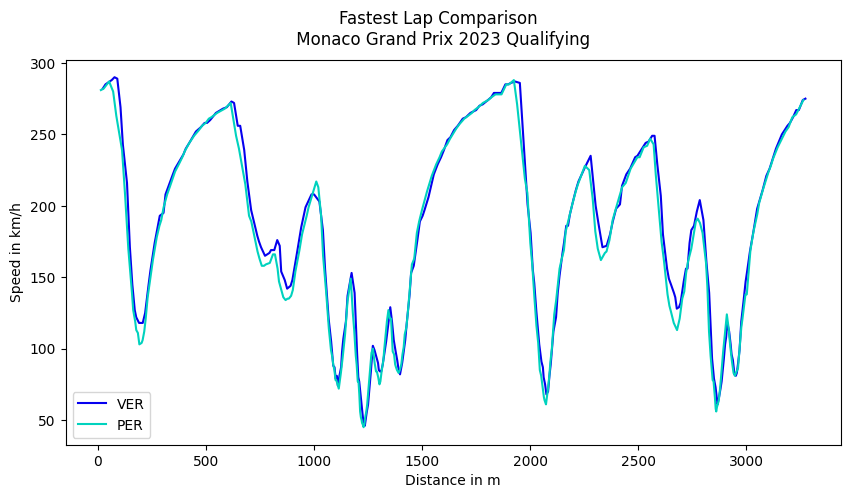

29.0
0 days 00:01:11.365000
2.0
0 days 00:01:13.850000
0 days 00:00:02.485000


In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
ver_laps = session.laps.pick_driver('VER')
per_laps = session.laps.pick_driver('PER')
ver_lap = ver_laps.pick_fastest()
per_lap = per_laps.pick_fastest()
ver_tel = ver_lap.get_car_data().add_distance()
per_tel = per_lap.get_car_data().add_distance()
rbr_color = fastf1.plotting.team_color('RBR')
mer_color = fastf1.plotting.team_color('MER')

ax.plot(ver_tel['Distance'], ver_tel['Speed'], color=rbr_color, label='VER')
ax.plot(per_tel['Distance'], per_tel['Speed'], color=mer_color, label='PER')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()

print(ver_lap['LapNumber'])
print(ver_lap['LapTime'])
print(per_lap['LapNumber'])
print(per_lap['LapTime'])
# Pint the difference in second of lap time ignoring the days
print(pd.to_timedelta(per_lap['LapTime']) - pd.to_timedelta(ver_lap['LapTime']))



In [19]:
ver_lap.get_car_data()

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime
0,2023-05-27 15:10:04.325,11158,282,7,100,False,12,car,0 days 00:00:00.299000,0 days 01:22:56.205000
1,2023-05-27 15:10:04.485,11315,285,7,100,False,12,car,0 days 00:00:00.459000,0 days 01:22:56.365000
2,2023-05-27 15:10:04.845,11350,288,7,100,False,12,car,0 days 00:00:00.819000,0 days 01:22:56.725000
3,2023-05-27 15:10:05.005,11371,290,7,91,False,12,car,0 days 00:00:00.979000,0 days 01:22:56.885000
4,2023-05-27 15:10:05.165,11197,289,7,0,True,8,car,0 days 00:00:01.139000,0 days 01:22:57.045000
...,...,...,...,...,...,...,...,...,...,...
257,2023-05-27 15:11:14.605,10796,262,6,100,False,12,car,0 days 00:01:10.579000,0 days 01:24:06.485000
258,2023-05-27 15:11:14.805,10517,267,7,100,False,12,car,0 days 00:01:10.779000,0 days 01:24:06.685000
259,2023-05-27 15:11:14.965,10767,267,7,100,False,12,car,0 days 00:01:10.939000,0 days 01:24:06.845000
260,2023-05-27 15:11:15.205,10890,274,7,100,False,12,car,0 days 00:01:11.179000,0 days 01:24:07.085000


In [20]:
#Create a df with the time delta and the team name the team with the fastest lap the time delta is 0
df = pd.DataFrame(session.laps.sort_values(by='LapTime').drop_duplicates(subset='Team', keep='first')['LapTime'].diff())
df['Team'] = session.laps.sort_values(by='LapTime').drop_duplicates(subset='Team', keep='first')['Team']
df = df.rename(columns={'LapTime': 'TimeDelta'})
df


,TimeDelta,Team
28,NaT,Red Bull Racing
53,0 days 00:00:00.084000,Aston Martin
79,0 days 00:00:00.022000,Ferrari
105,0 days 00:00:00.082000,Alpine
163,0 days 00:00:00.172000,Mercedes
246,0 days 00:00:00.357000,AlphaTauri
268,0 days 00:00:00.172000,McLaren
330,0 days 00:00:00.273000,Williams
371,0 days 00:00:00.098000,Alfa Romeo
391,0 days 00:00:00.645000,Haas F1 Team


In [21]:
race_session = fastf1.get_session(2023, 'Monaco Grand Prix', 'R')
race_session.load()

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.0.3]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']


In [22]:
race_session.results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,NED,1.0,1,1.0,NaT,NaT,NaT,0 days 01:48:51.980000,Finished,25.0
14,14,F ALONSO,ALO,alonso,Aston Martin,358C75,aston_martin,Fernando,Alonso,Fernando Alonso,...,ESP,2.0,2,2.0,NaT,NaT,NaT,0 days 00:00:27.921000,Finished,18.0
31,31,E OCON,OCO,ocon,Alpine,2293D1,alpine,Esteban,Ocon,Esteban Ocon,...,FRA,3.0,3,3.0,NaT,NaT,NaT,0 days 00:00:36.990000,Finished,15.0
44,44,L HAMILTON,HAM,hamilton,Mercedes,6CD3BF,mercedes,Lewis,Hamilton,Lewis Hamilton,...,GBR,4.0,4,5.0,NaT,NaT,NaT,0 days 00:00:02.072000,Finished,13.0
63,63,G RUSSELL,RUS,russell,Mercedes,6CD3BF,mercedes,George,Russell,George Russell,...,GBR,5.0,5,8.0,NaT,NaT,NaT,0 days 00:00:17.222000,Finished,10.0
16,16,C LECLERC,LEC,leclerc,Ferrari,F91536,ferrari,Charles,Leclerc,Charles Leclerc,...,MON,6.0,6,6.0,NaT,NaT,NaT,0 days 00:01:01.890000,Finished,8.0
10,10,P GASLY,GAS,gasly,Alpine,2293D1,alpine,Pierre,Gasly,Pierre Gasly,...,FRA,7.0,7,7.0,NaT,NaT,NaT,0 days 00:01:02.362000,Finished,6.0
55,55,C SAINZ,SAI,sainz,Ferrari,F91536,ferrari,Carlos,Sainz,Carlos Sainz,...,ESP,8.0,8,4.0,NaT,NaT,NaT,0 days 00:01:03.391000,Finished,4.0
4,4,L NORRIS,NOR,norris,McLaren,F58020,mclaren,Lando,Norris,Lando Norris,...,GBR,9.0,9,10.0,NaT,NaT,NaT,NaT,+1 Lap,2.0
81,81,O PIASTRI,PIA,piastri,McLaren,F58020,mclaren,Oscar,Piastri,Oscar Piastri,...,AUS,10.0,10,11.0,NaT,NaT,NaT,NaT,+1 Lap,1.0
